## Ejercicio 2 - Bucles de retroalimentación y dinámica no lineal

### Parte teórica 
Responda las siguientes preguntas de forma clara


1. Describa cómo los bucles de retroalimentación crean:

a. Crecimiento exponencial (bucle de refuerzo):
Un bucle de refuerzo amplifica el cambio. Por ejemplo, más personas infectadas → más contagios → aún más infectados. El cambio se acelera con el tiempo.

b. Equilibrio (bucle de equilibrio):
Un bucle de equilibrio contrarresta el cambio. Si algo aumenta, el sistema reacciona para reducirlo y volver al equilibrio. Ejemplo: aumento de temperatura corporal → sudoración → disminución de temperatura.






2. Analice el modelo epidémico SIR:

a. Etiquete todos los stocks/flujos del sistema.

Stocks: 
- Susceptibles (S)

- Infectados (I)

- Recuperados (R)

Flujos:

- De S a I: Tasa de infección = βSI

- De I a R: Tasa de recuperación = γI

b. Identifique los bucles de retroalimentación que rigen la propagación de la infección.

- Bucle de refuerzo: Más infectados → más contagios → más infectados.

- Bucle de equilibrio: Más infectados → más se recuperan → disminuyen infectados.


3. Por qué los sistemas no lineales requieren simulación numérica:

Porque no son predecibles con fórmulas simples. En un sistema lineal, los cambios son proporcionales, y se pueden resolver con matemáticas. Pero en un sistema no lineal, como βSI, se están multiplicando dos variables que cambian con el tiempo:

S (personas sanas)

I (personas infectadas)

Esto significa que:

A medida que cambia S, también cambia I, y ambos afectan el resultado al mismo tiempo.

No hay una fórmula exacta que diga lo que pasará en cualquier momento.

Entonces, para saber cómo evoluciona el sistema, lo hacemos paso a paso con la computadora, usando simulación numérica, que calcula pequeños cambios de tiempo (como de día en día).

### Parte práctica

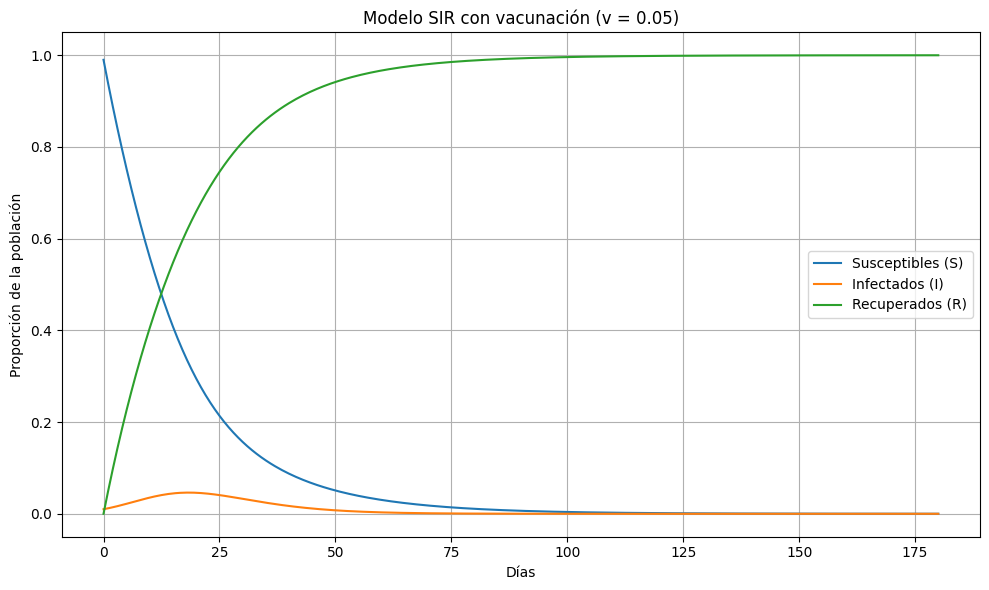

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros del modelo ---
beta = 0.3     # Tasa de infección
gamma = 0.1    # Tasa de recuperación
v = 0.05       # Tasa de vacunación
days = 180     # Días de simulación
dt = 0.5       # Paso de tiempo (en días)
timesteps = int(days / dt)
time = np.linspace(0, days, timesteps + 1)

# --- Función para simular el modelo SIR con vacunación ---
def simulate_sir_vaccination(v, S0=0.99, I0=0.01, R0=0.0):
    S = np.zeros(timesteps + 1)
    I = np.zeros(timesteps + 1)
    R = np.zeros(timesteps + 1)

    # Condiciones iniciales
    S[0], I[0], R[0] = S0, I0, R0

    # Método de Euler para resolver el sistema de ecuaciones
    for t in range(timesteps):
        dS = -beta * S[t] * I[t] - v * S[t]
        dI = beta * S[t] * I[t] - gamma * I[t]
        dR = gamma * I[t] + v * S[t]

        S[t+1] = S[t] + dS * dt
        I[t+1] = I[t] + dI * dt
        R[t+1] = R[t] + dR * dt

    return time, S, I, R

# --- Simular para v = 0.05 ---
time, S_05, I_05, R_05 = simulate_sir_vaccination(v=0.05)

# --- Graficar los resultados ---
plt.figure(figsize=(10, 6))
plt.plot(time, S_05, label='Susceptibles (S)')
plt.plot(time, I_05, label='Infectados (I)')
plt.plot(time, R_05, label='Recuperados (R)')
plt.title('Modelo SIR con vacunación (v = 0.05)')
plt.xlabel('Días')
plt.ylabel('Proporción de la población')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


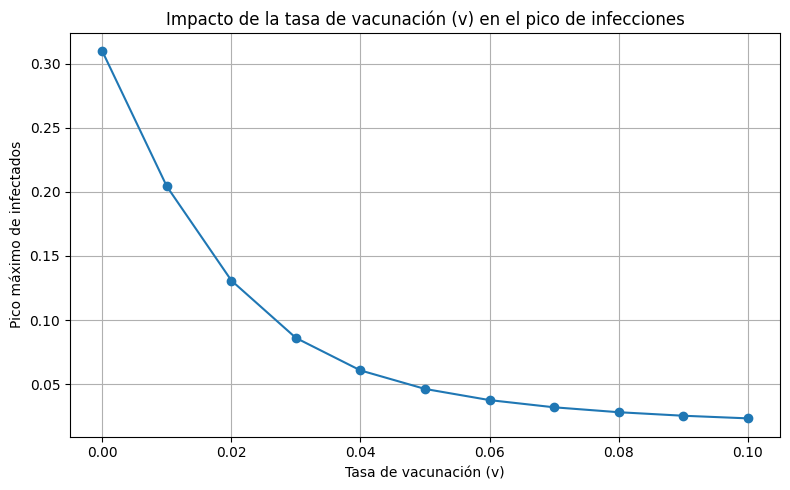

In [2]:
# --- Probar varios valores de v de 0 a 0.1 ---
v_values = np.linspace(0, 0.1, 11)  # 11 valores entre 0 y 0.1
peak_infections = []

for v in v_values:
    _, _, I, _ = simulate_sir_vaccination(v)
    peak_infections.append(np.max(I))  # Guardar el máximo de infectados

# --- Graficar el pico de infecciones en función de v ---
plt.figure(figsize=(8, 5))
plt.plot(v_values, peak_infections, marker='o')
plt.title('Impacto de la tasa de vacunación (v) en el pico de infecciones')
plt.xlabel('Tasa de vacunación (v)')
plt.ylabel('Pico máximo de infectados')
plt.grid(True)
plt.tight_layout()
plt.show()


¿Cómo altera la vacunación los ciclos de retroalimentación?

La vacunación introduce un nuevo bucle de equilibrio, que reduce los susceptibles antes de que se infecten. Esto rompe el ciclo de contagio del bucle de refuerzo (más infectados → más contagios).

¿Cuál es el valor mínimo de v para prevenir un brote?

El valor mínimo de v para prevenir un brote significativo es aproximadamente 0.08 (o 8% diario). Con esta tasa, el número de infectados nunca sube mucho. 

Último prompt utilizado:

"Me puedes explicar a detalle porque se debería usar np.zeros y cómo funciona el método euler por favor"

Funcionó porque fue específico, me dió una explicación clara de elementos clave del código y solución de EDs.

Me explicó que np.zeros() se utiliza para crear arreglos vacíos que almacenan los valores del modelo SIR a lo largo del tiempo. También me aclaró que el método de Euler permite simular cómo cambian los valores en el tiempo utilizando pasos pequeños, lo que simula sistemas dinámicos.
